<a href="https://colab.research.google.com/github/R3gm/Colab-resources/blob/main/OCR_with_Pytesseract_and_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR with Pytesseract and OpenCV

Pytesseract is an optical character recognition tool for Python that is used to extract text from images. It is a wrapper for Google’s Tesseract-OCR Engine and supports a wide variety of languages. 

In [8]:
!sudo apt install tesseract-ocr libtesseract-dev
!pip -q install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 8,193 kB of archives.
After this operation, 31.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libarchive-dev amd64 3.4.0-2ubuntu1.2 [491 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libleptonica-dev amd64 1.79.0-1 [1,389 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libtesseract-dev amd64 4.1.1-2build2 [1,463 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:5 http://archive.ubuntu

In [10]:
!wget https://nanonets.com/blog/content/images/2019/12/invoice-sample.jpg -O image.jpg
!wget https://nanonets.com/blog/content/images/2019/12/greek-thai.png

--2023-05-13 15:03:06--  https://nanonets.com/blog/content/images/2019/12/invoice-sample.jpg
Resolving nanonets.com (nanonets.com)... 13.226.52.15, 13.226.52.100, 13.226.52.122, ...
Connecting to nanonets.com (nanonets.com)|13.226.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69157 (68K) [image/jpeg]
Saving to: ‘image.jpg’

image.jpg           100%[===================>]  67.54K  --.-KB/s    in 0.03s   

2023-05-13 15:03:06 (2.32 MB/s) - ‘image.jpg’ saved [69157/69157]

--2023-05-13 15:03:06--  https://nanonets.com/blog/content/images/2019/12/greek-thai.png
Resolving nanonets.com (nanonets.com)... 13.226.52.15, 13.226.52.100, 13.226.52.122, ...
Connecting to nanonets.com (nanonets.com)|13.226.52.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63914 (62K) [image/png]
Saving to: ‘greek-thai.png.2’

greek-thai.png.2    100%[===================>]  62.42K  --.-KB/s    in 0.03s   

2023-05-13 15:03:06 (2.00 MB/s) - ‘greek-thai.png

In [11]:
import cv2 
import pytesseract

img = cv2.imread('image.jpg')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'http://mrsinvoice.com\nI 7\nYour Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334\nBILL TO:\nP: 111-222-333, F: 111-222-334 a. z\ncient@eromplent\nContact Phone 101-102-103\njohn Doe office ayment Terms ‘ash on Delivery\nOffice Road 38\nP: 111-333-222, F: 122-222-334 Amount Due: $4,170\noffice@example.net\nNO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT\nHOURS: PRICE\n1 aye 2 $20 $40\n2 | Steering Wheel 5 $10 $50\n3 | Engine oil 10 $15 $150\n4 | Brake Pad 24 $1000 $2,400\nSubtotal $275\nTax (10%) $27.5\nGrand Total $302.5\n‘THANK YOU FOR YOUR BUSINESS\n\x0c'

## Preprocessing for Tesseract

In [12]:
import cv2
import numpy as np

img = cv2.imread('image.jpg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 


In [13]:
image = cv2.imread('image.jpg')

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)


In [16]:
# this is only for google colab, the original is cv2.imshow()
from google.colab.patches import cv2_imshow

### results of OCR with preprocessing

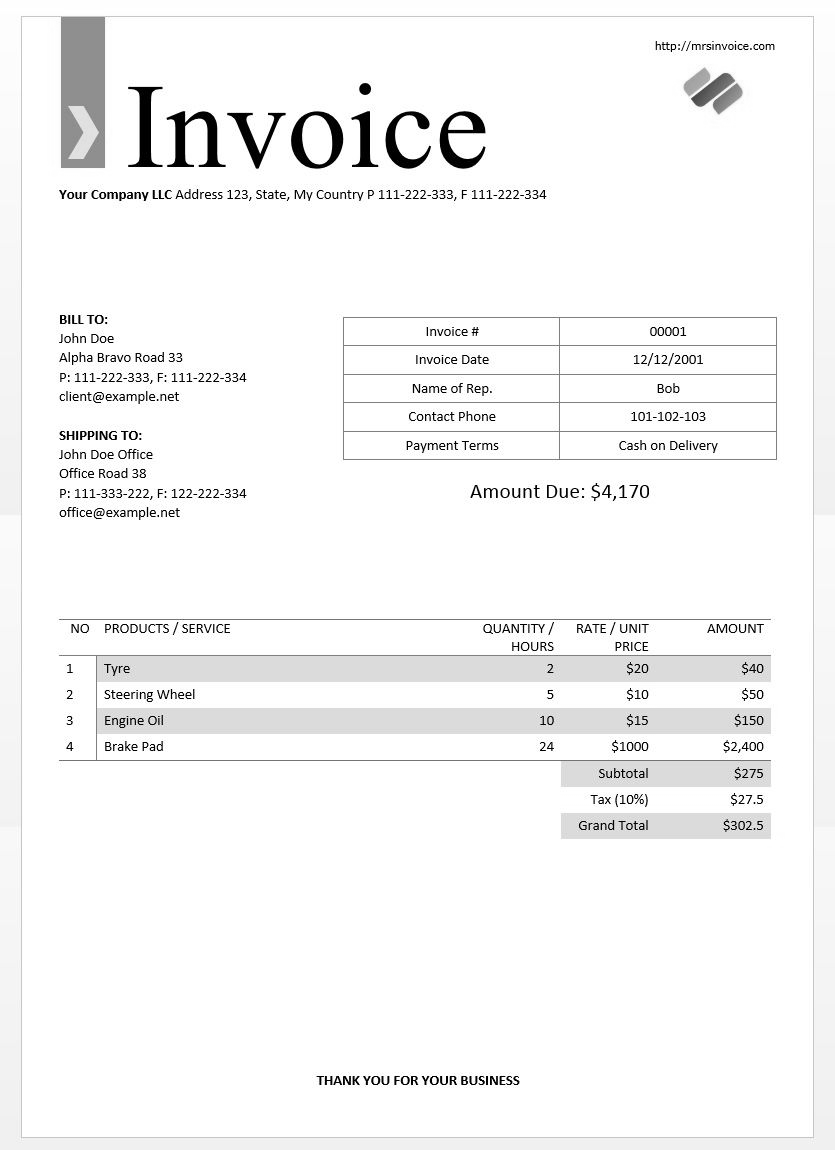

'http://mrsinvoice.com\nLh,\nI |\nYour Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334\nBILL TO:\nP: 111-222-333, F: 111-222-334 a. z\ncient@eromplent\nContact Phone 101-102-103\njohn Doe office ayment Terms ‘ash on Delivery\nOffice Road 38\nP: 111-333-222, F: 122-222-334 Amount Due: $4,170\noffice@example.net\nNO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT\nHOURS. PRICE\n1 tye 2 $20 $40\n2__| Steering Wheel 5 $10 $50\n3 | Engine oil 10 $15 $150\n4 | Brake Pad 24 $1000 $2,400\nSubtotal $275\nTax (10%) $27.5\nGrand Total $302.5\n‘THANK YOU FOR YOUR BUSINESS\n\x0c'

In [17]:
img = gray
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

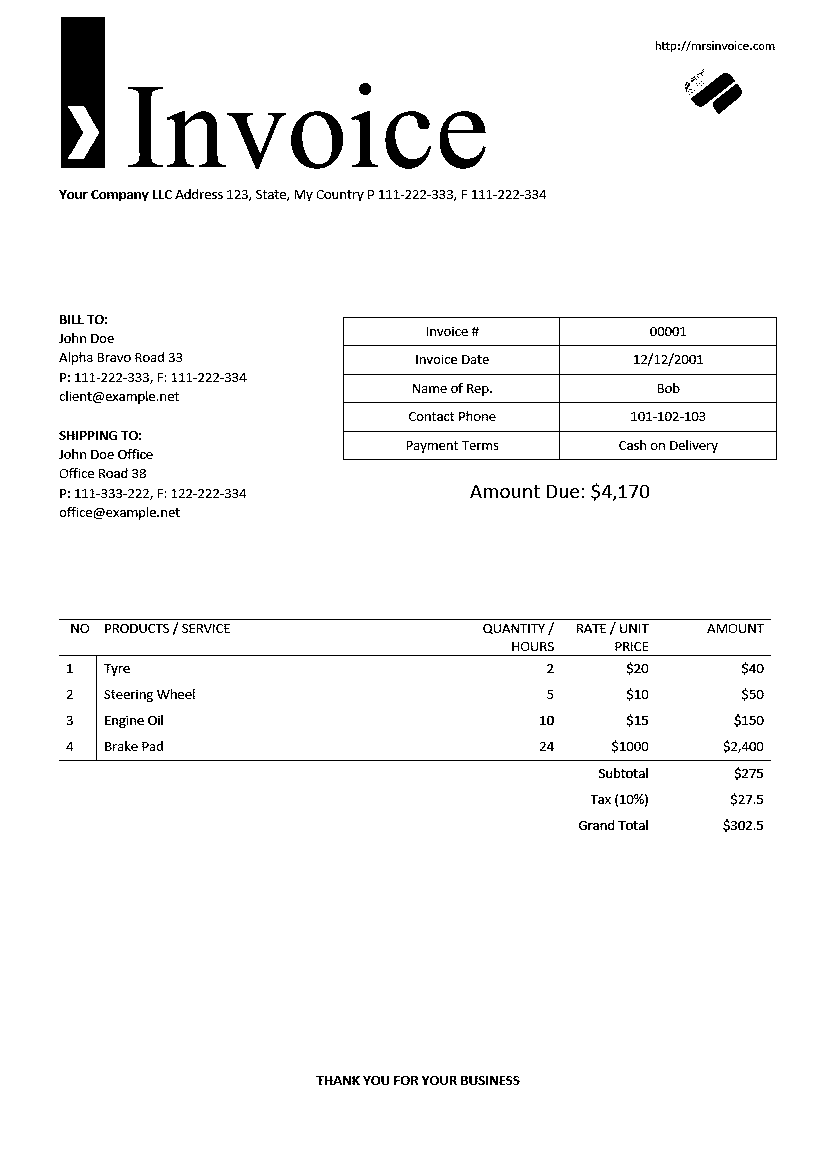

'bhttps//mrsinvoice.com\nLp\nI |\nYour Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334\nBILL TO:\nP: 111-222-333, F: 111-222-334 m .\ndlent@ccomplent\nContact Phone 101-102-103\njohn Doe office ayment Terms ash on Delivery\nOffice Road 38\nP: 111-833-222, F: 122-222-334 Amount Due: $4,170\noffice@example.net\nNO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT\nHOURS, PRICE\n1 | tyre 2 $20 $40\n2 | Steering Wheet 5 $10 $50\n3 | Engine ol 40 $15 $150\n4 | Brake Pad 2a $1000 $2,400\nSubtotal $275\nTax (10%) $275\nGrand Total $302.5\n‘THANK YOU FOR YOUR BUSINESS\n\x0c'

In [18]:
img = thresh
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

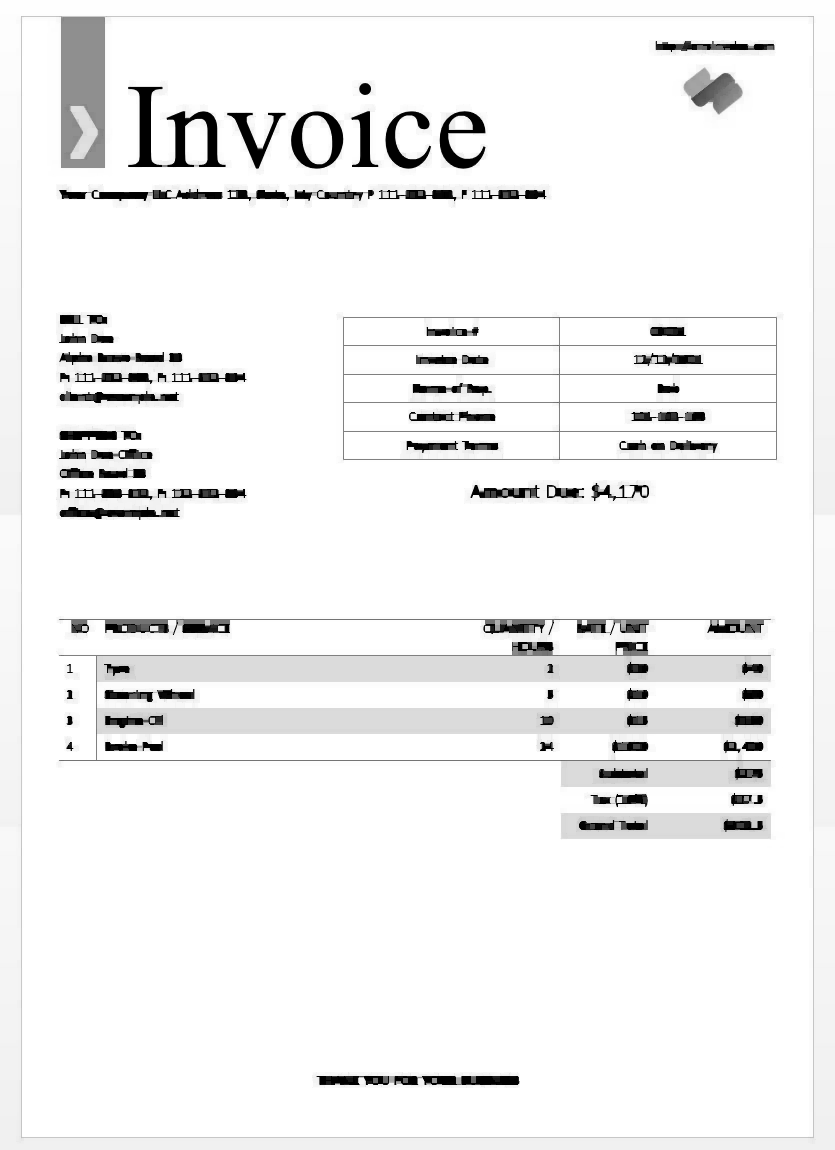

"ae tia2 ra a\n' In )\namr Comey EC Andis TO, Si, bby Comutry PITT a-S, F TT a at\nae\n=e ee _\n=o a\n— | eee\neee ot\n—n ee\nbecome [ne | ee\nom Rae a\n1,» oa Aamcuurrt Dum: $4,170\nAo\n1 |= 1 - -\n2 | cing too ' oo -\n2 | gece » - —_\n4 | Raion Pal ™ — am\nom o\n= (7 =\nes tee —_\nSte te\n\x0c"

In [19]:
img = opening
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

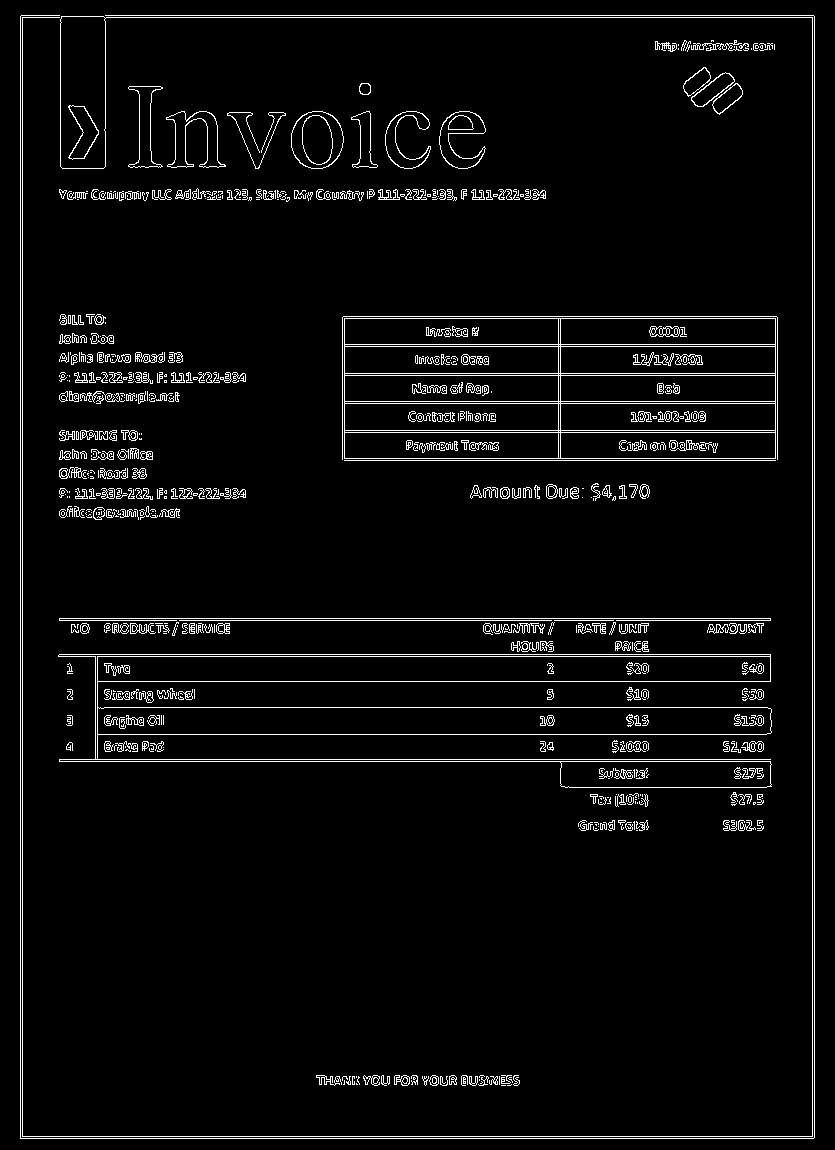

"Dt aero\ni '\nec Lee ca ee ee)\nned\ney ee ee eee\nen ee\n: ADLAOUEEOA, Fr ANLZOIAEBA --——————..\na So | ee\na\nBsa Somos 7\nne a\nCE)\nEe ee ple ae) OU L nL)\nCec ena cd\nom eas ea Core cy rao\nfeu re\ni\nae A ED $30\na | engin oa 20 3 Bey\na | eraser Ea Ee Eo\nsaid a\ncorn) oes\noa ay\nRenee Ones\n\x0c"

In [20]:
img = canny
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

## keys

In [22]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('image.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


## Getting boxes around text

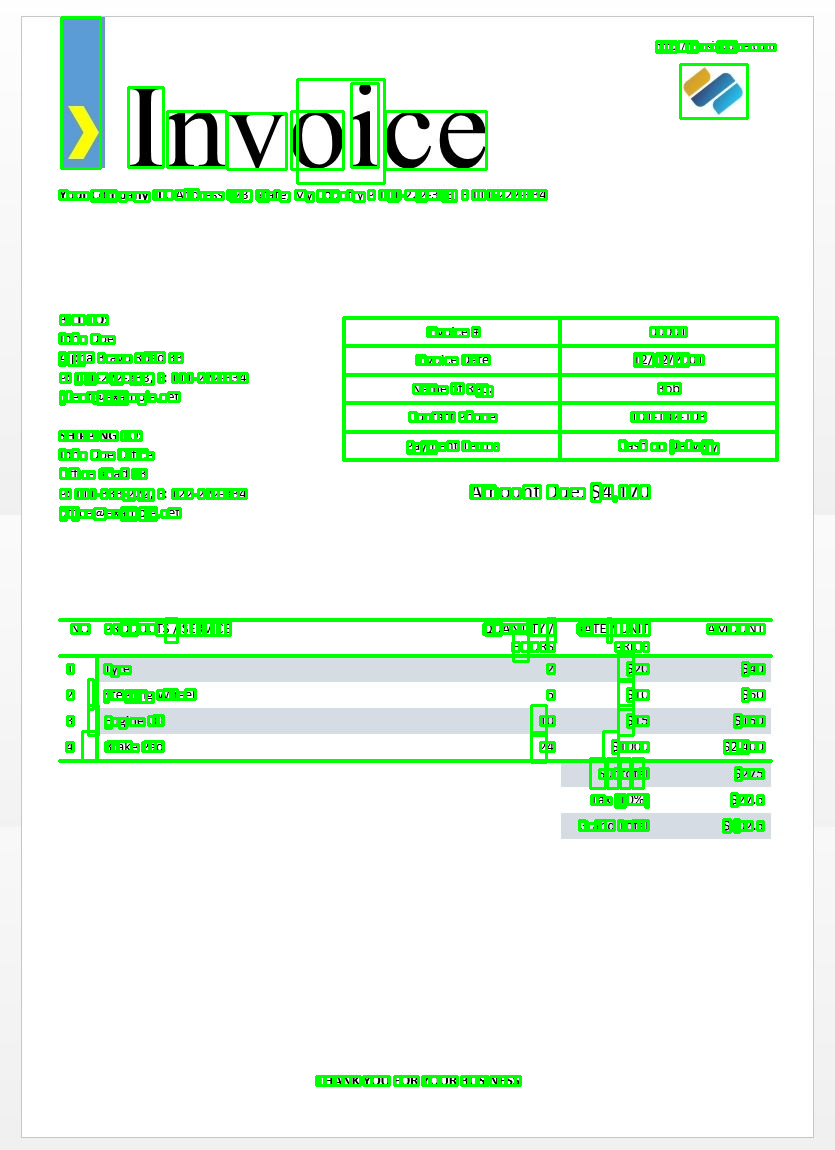

-1

In [21]:
import cv2
import pytesseract

img = cv2.imread('image.jpg')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2_imshow( img)
cv2.waitKey(0)


## Getting boxes around text words

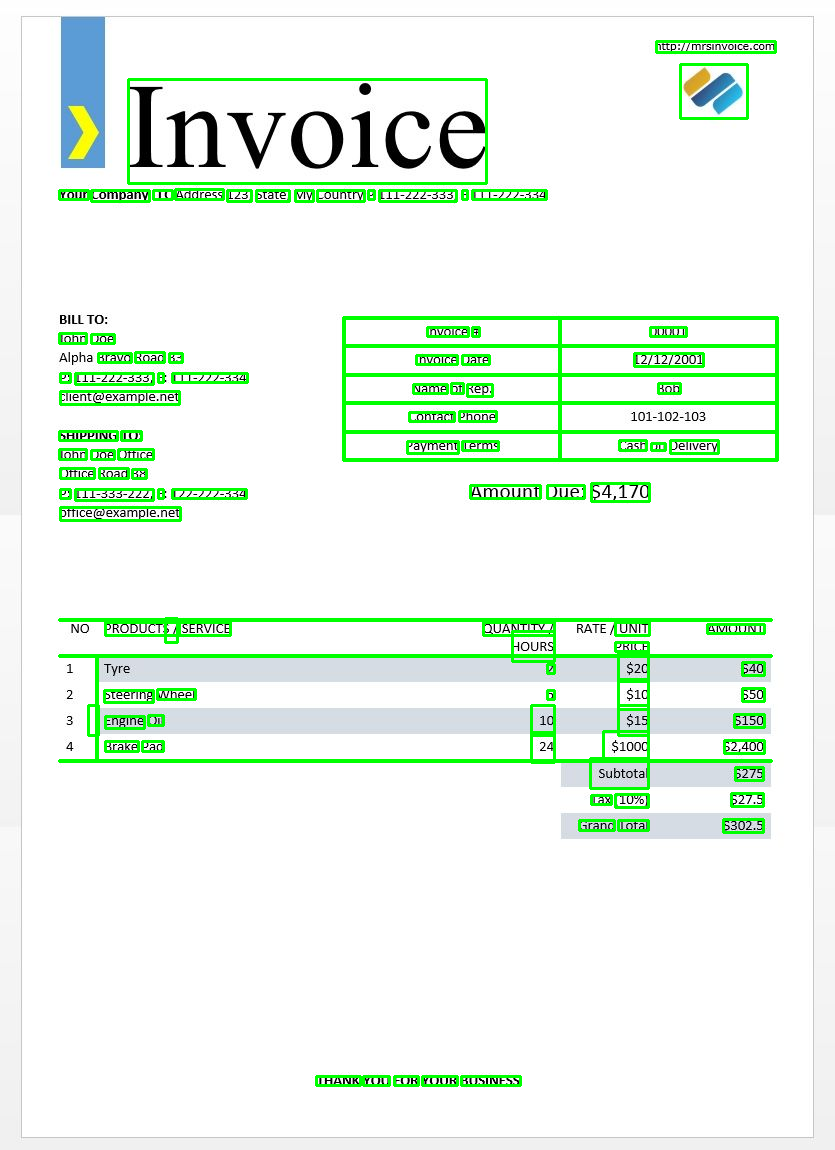

-1

In [23]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)


## Text template matching

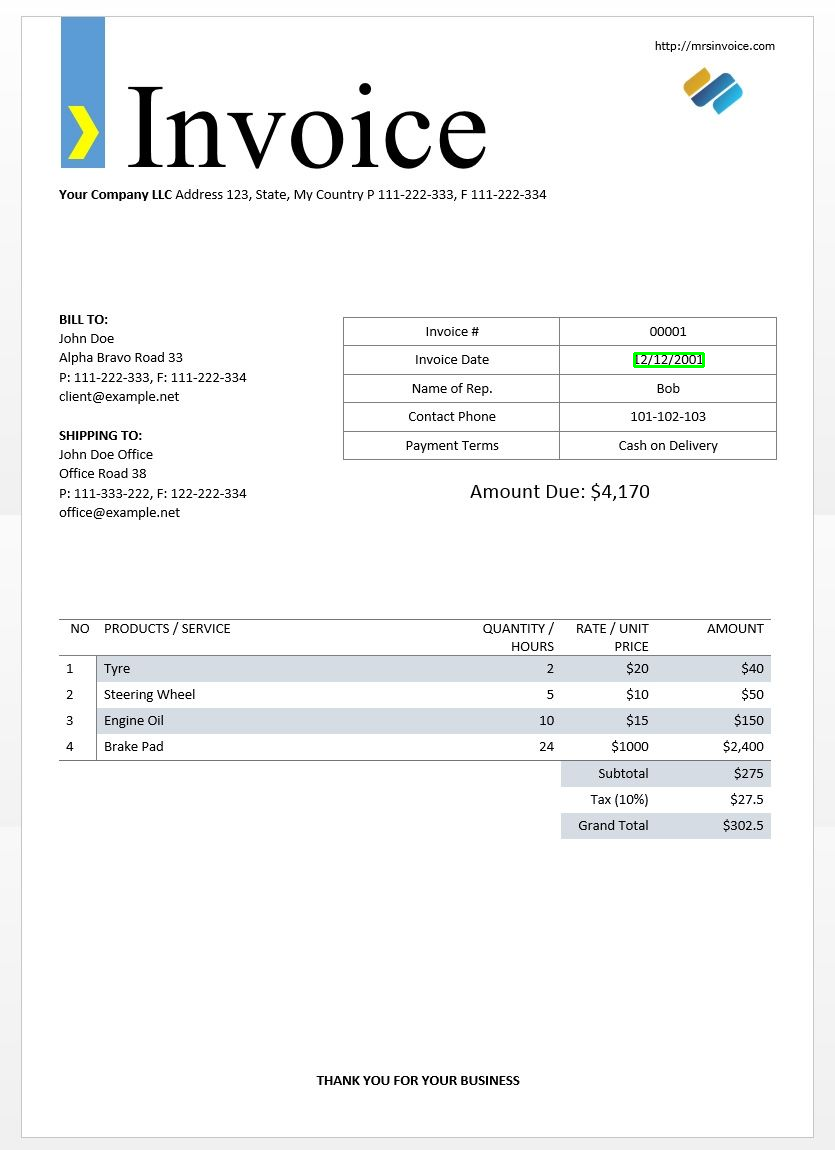

-1

In [24]:
import re
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('image.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow( img)
cv2.waitKey(0)

## Custom detection, only numbers

In [25]:
custom_config = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(img, config=custom_config))


.
7
123111-222-333111-222-334
111-222-333111-222-334 .
101-102-103
.
38
111-333-222122-222-334 .4.170
.
.
1 2 20 40
2 5 10 50
3 10 15 150
4 24 1000 2400
275
10 27.5
302.5



## Blacklisting characters

In [26]:
custom_config = r'-c tessedit_char_blacklist=0123456789 --psm 6'
pytesseract.image_to_string(img, config=custom_config)


'http://mrsinvoice.com\nI ”\nYour Company LLC Address , State, My Country P --, F --\nBILL TO:\nP: --, F: -- a. e\ncient@eromplent\nContact Phone --\njohn Doe office ayment Terms ‘ash on Delivery\nOffice Road\nP: --, F: ?-- Amount Due: $,/O\noffice@example.net\nNO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT\nHOURS: PRICE\na aye z $ $a\n?__ | Steering Wheel s $ $\n_ | Engine oil o gis $\na | Brake Pad $ $,\nSubtotal $z\nTax (%) $.\nGrand Total $.\n‘THANK YOU FOR YOUR BUSINESS\n\x0c'

## Select language

In [27]:
!tesseract --list-langs

List of available languages (2):
eng
osd


In [28]:
custom_config = r'-l eng --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'http://mrsinvoice.com\nI 7\nYour Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334\nBILL TO:\nP: 111-222-333, F: 111-222-334 a. e\ncient@eromplent\nContact Phone 101-102-103\njohn Doe office ayment Terms ‘ash on Delivery\nOffice Road 38\nP: 111-333-222, F: 122-222-334 Amount Due: $4,170\noffice@example.net\nNO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT\nHOURS: PRICE\n1 aye 2 $20 $40\n2 | Steering Wheel 5 $10 $50\n3 | Engine oil 10 $15 $150\n4 | Brake Pad 24 $1000 $2,400\nSubtotal $275\nTax (10%) $27.5\nGrand Total $302.5\n‘THANK YOU FOR YOUR BUSINESS\n\x0c'

## Detection in multiple languages

Download languages here https://github.com/tesseract-ocr/tessdoc/blob/main/Data-Files-in-different-versions.md

In [29]:
!sudo apt-get install tesseract-ocr-grc
!sudo apt-get install tesseract-ocr-tha

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-grc
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 916 kB of archives.
After this operation, 2,261 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-grc all 1:4.00~git30-7274cfa-1 [916 kB]
Fetched 916 kB in 0s (3,280 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-grc.
(Reading databas

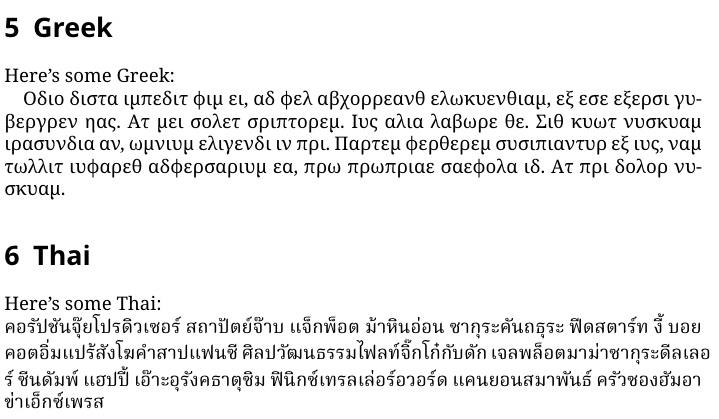

'5 Greek\nHere’s some Greek:\n\nΟδιο διστα ιμπεδιτ φιμ ει, αδ φελ αβχορρεανθ ελωκυενθιαμ, εξ εσε εξερσι γυ-\nβεργρεν ηας. Ατ μει σολετ σριπτορεμ. ἴυς αλια λαβωρε θε. Σιθ κυωτ νυσκυαμ\nτρασυνδια αν, ὠμνιυμ ελιγενδι τιν πρι. Παρτεμ φερθερεμ συσιπιαντὺυρ εξ ιυς,ναμ\n%0790 แ ร เง ๑ ๕ 80 ๕ 6 ๑ อ 06 ส 0 เง น อ ๓ , πρω πρωπριαε σαεφολα ιδ. Ατ πρι δολορ νυ-\nσκυαμ.\n\n6 Thai\n\nHere’s some Thai: ν᾿\n\nค อ ร ั ป ซั น จ ุ ้ ย โป ร ด ิ ว เซ อ ร ์ ส ถา ป ั ต ย ์ จ ๊ า บ แจ ็ ก พ ็ อ ต ม ้ า ห ิ น อ ่ อ น ซา ก ุ ร ะ ค ั น ถ ธ ุ ร ะ ฟิ ด ส ต า ร ์ ท ง ี ้ บ อ ย\nค อ ต อ ื ่ ม แป ร ั ส ั ง โฆ ค ํ า ส า ป แฟ น ซี ศิ ล ป ว ั ฒ น ธร ร ม ไฟ ล ท ์ จ ิ ๊ ก โก ๋ ก ั บ ด ั ก เจ ล พ ล ็ อ ต ม า ม ่ า ซา ก ุ ร ะ ด ี ล เล อ\nร ์ ซี น ด ั ม พ ์ แฮ ป ป ี ้ เอ ๊ ้ า ะ อ ุ ร ั ง ค ธา ต ุ ซิ ม ฟิ น ิ ก ซ์ เท ร ล เล ่ อ ร ์ อ ว อ ร ์ ด แค น ย อ น ส ม า พ ั น ธ์ ค ร ั ว ซอ ง ฮั ม อ า\nข่ า เอ ็ ก ซ์ เพ ร ส\n\x0c'

In [30]:
img = cv2.imread('greek-thai.png')
cv2_imshow(img)
# Adding custom options
custom_config = r'-l grc+tha+eng --psm 6'
pytesseract.image_to_string(img, config=custom_config)

## Language detection

In [32]:
!pip -q install langdetect

In [33]:
custom_config = r'-l grc+tha+eng --psm 6'
txt = pytesseract.image_to_string(img, config=custom_config)

from langdetect import detect_langs
detect_langs(txt)

[th:0.7142844575669524, el:0.2857154479977306]

## Script, run in loop for read pages

In [34]:
def read_text_from_image(image):
  """Reads text from an image file and outputs found text to text file"""
  # Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Perform OTSU Threshold
  ret, thresh = cv2.threshold(gray_image, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

  dilation = cv2.dilate(thresh, rect_kernel, iterations = 1)

  contours, hierachy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  image_copy = image.copy()

  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    cropped = image_copy[y : y + h, x : x + w]

    file = open("results.txt", "a")

    text = pytesseract.image_to_string(cropped)

    file.write(text)
    file.write("\n")

  file.close()



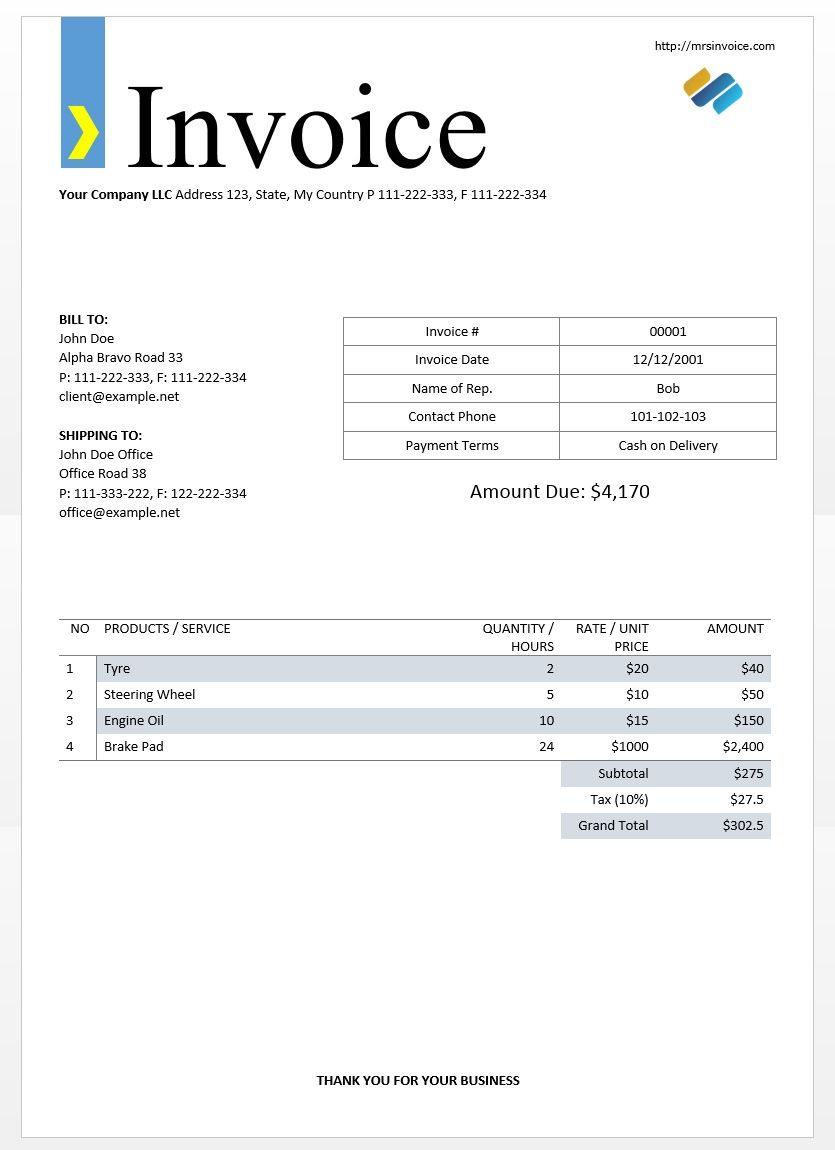





http://mrsinvoice.com



&



Invoice



Your Company LLC Address 123, State, My Country P 111-222-333, F 111-222-334



client@example.net

P: 111-222-338, F: 111-222-334



Alpha Bravo Road 33



John Doe

BILLTO:



 



 



Cash on Delivery



 



Payment Terms



 



 



Contact Phone 101-102-103



Name of Rep. Bob

Invoice Date 12/12/2001

Invoice # 00001



 



 



 



 



office@example.net

P: 111-383-222, F: 122-222-834



Office Road 38,



John Doe Office



SHIPPING TO:



Amount Due: $4,170



Grand Total $302.5



Tax (10%) $27.5



Subtotal $275



4 | Brake Pad 24 $1000 $2,400



3 | Engine oil 10 $15 $150



2 | Steering Wheel 5 $10 $50



1 | Tyre 2 $20 $40



HOURS: PRICE

NO PRODUCTS / SERVICE QUANTITY / RATE / UNIT AMOUNT



 



 



 



 



THANK YOU FOR YOUR BUSINESS



In [35]:
image = cv2.imread("image.jpg")
read_text_from_image(image)

# OCR results
cv2_imshow(image)
f = open("results.txt", "r")
lines = f.readlines()
lines.reverse()
for line in lines:
    print(line)
f.close()